In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import datetime
#数据可视化库
from matplotlib import pylab as plt
import seaborn as sns
import datetime
import time
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

/Users/88michael/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.linear_model import LogisticRegression

In [3]:
#随机森林
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

In [5]:
store=pd.read_csv("store.csv",low_memory=False)
#read_csv参数：parse_dates解析索引,index_col用作行索引的列编号，low_memory分块加载到内存，再低内存消耗中解析
train=pd.read_csv("train.csv",parse_dates=[2], low_memory=False)     #,index_col='Date')
test=pd.read_csv('test.csv',parse_dates=[3],low_memory=False)


In [6]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)

In [7]:
store.fillna(0,inplace=True)

In [8]:
test.fillna(1,inplace=True)

In [9]:
train=pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

In [10]:
train=train[train["Open"]!=0]
train = train[train["Sales"]>0]

In [11]:
def features_create(data):
    
    
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +         (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) +         (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
  
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1

    return data

In [12]:
features_create(train)
features_create(test)
print('Features creation finished')

Features creation finished


In [13]:
train = train.sort_values(['Date'],ascending = False)
valid = train[:6*7*1115]
train = train[6*7*1115:]

In [14]:
train.drop(['PromoInterval'],axis=1,inplace=True)
test.drop(['PromoInterval'],axis=1,inplace=True)

In [15]:
train.drop(['Date'],axis=1,inplace=True)
test.drop(['Date'],axis=1,inplace=True)

In [16]:
train.drop(['Customers'],axis=1,inplace=True)

In [17]:
train.drop(['Open'],axis=1,inplace=True)
test.drop(['Open'],axis=1,inplace=True)

In [18]:
train.drop(['monthStr'],axis=1,inplace=True)
test.drop(['monthStr'],axis=1,inplace=True)

In [ ]:
#x_train, x_valid = cross_validation.train_test_split(train, test_size=0.2, random_state=42)

In [19]:
x_train=train.drop(['Sales'],axis=1)
x_valid=train.drop(['Sales'],axis=1)

y_train=train['Sales']
y_valid=train['Sales']

x_test=test.drop(['Id'],axis=1,inplace=True)

In [22]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

[1]	valid_0's l2: 9.35719e+06	valid_0's l1: 2256.82
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 9.11155e+06	valid_0's l1: 2225.48
[3]	valid_0's l2: 8.87948e+06	valid_0's l1: 2196.14
[4]	valid_0's l2: 8.66829e+06	valid_0's l1: 2169.35
[5]	valid_0's l2: 8.47542e+06	valid_0's l1: 2144.01
[6]	valid_0's l2: 8.29923e+06	valid_0's l1: 2121.14
[7]	valid_0's l2: 8.1386e+06	valid_0's l1: 2100.07
[8]	valid_0's l2: 7.99521e+06	valid_0's l1: 2080.14
[9]	valid_0's l2: 7.86131e+06	valid_0's l1: 2062.51
[10]	valid_0's l2: 7.73839e+06	valid_0's l1: 2046.1
[11]	valid_0's l2: 7.62139e+06	valid_0's l1: 2030.05
[12]	valid_0's l2: 7.50813e+06	valid_0's l1: 2014.57
[13]	valid_0's l2: 7.40611e+06	valid_0's l1: 2000.65
[14]	valid_0's l2: 7.30282e+06	valid_0's l1: 1986.51
[15]	valid_0's l2: 7.21457e+06	valid_0's l1: 1973.59
[16]	valid_0's l2: 7.14112e+06	valid_0's l1: 1962.84
[17]	valid_0's l2: 7.07052e+06	valid_0's l1: 1953.43
[18]	valid_0's l2: 6.98795e+06	valid_0's l1: 1943

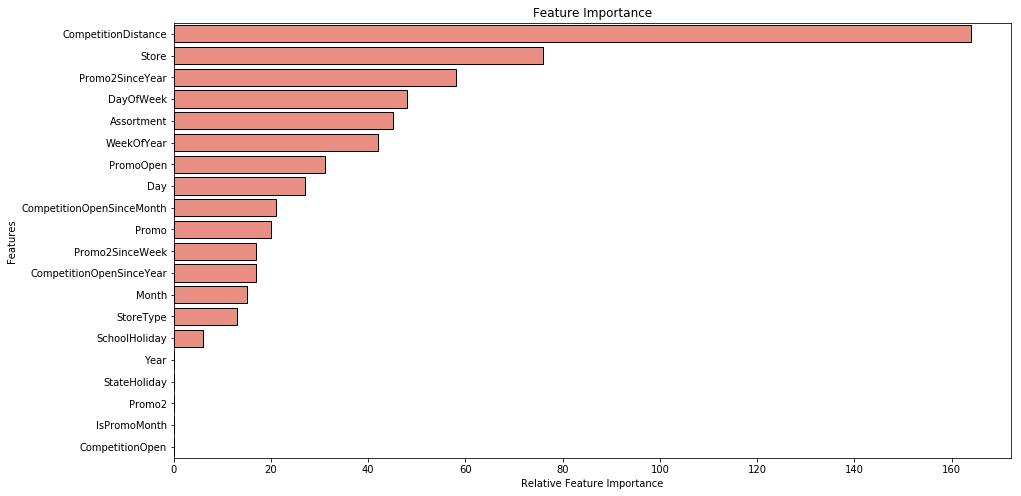

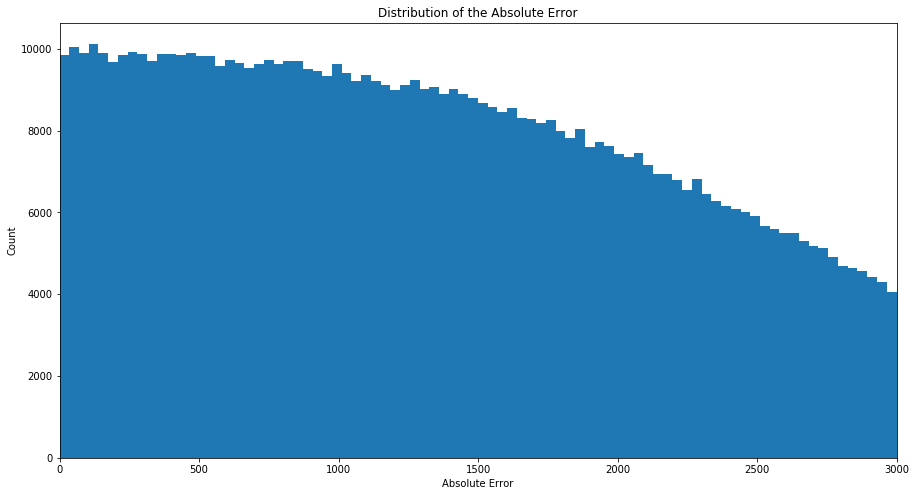

In [26]:
gbm=lgb.LGBMRegressor(objective='regression',num_leaves=31,learning_rate=0.05,n_estimators=20)
gbm.fit(x_train,y_train,
       eval_set=[(x_valid, y_valid)],
        eval_metric='l1',
        early_stopping_rounds=5)
print('Start predicting...')
print(gbm)
num_iteration=gbm.best_iteration_
y_pred=gbm.predict(x_valid,num_iteration=gbm.best_iteration_)
print('Best Iteration:', num_iteration)
print('The rmse of prediction is:', mean_squared_error(y_valid,y_pred)**0.5)
print('Feature importances:', list(gbm.feature_importances_))

features=gbm.feature_importances_
features_list=x_train.columns.values
feature_importance = DataFrame(list(reversed(sorted(zip(features, features_list)))))
fig,ax=plt.subplots(1,1,figsize=(15,8))
sns.barplot(x=0,y=1,color="salmon",data=feature_importance,edgecolor="black")
plt.xlabel("Relative Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")



mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
mae = median_absolute_error(y_valid, y_pred)

# Calculate the mean absolute error for all `y_v`
pred_dist = abs((y_valid)-(y_pred))

# Get the statistics on `pred_dist`
mean = np.mean(pred_dist)
variance = np.var(pred_dist)
sigma = np.sqrt(variance)
print("Mean Squared Error:", mse)
print("R2 Error:", r2)
print("Median Absolute Error:", mae)
print("Mean:", mean)
print("Variance(sigma2):", variance)
print("Sigma:", sigma)

# Plot the distribution of the mean absolute error
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plt.hist(pred_dist, bins=1000)
plt.xlim([0,3000])
plt.xlabel("Absolute Error")
plt.ylabel("Count")
plt.title("Distribution of the Absolute Error")

print("Training Score:%f" % gbm.score(x_train,y_train))
print('Valid Score:%f' % gbm.score(x_valid,y_valid))

In [27]:
def rmsle(y_true, y_pred):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False

In [30]:
gbm.fit(x_train, y_train,
        eval_set=[(x_valid, y_valid)],
        eval_metric=rmsle,
        early_stopping_rounds=5)
y_pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration_)
print(gbm)
print('The rmsle of prediction is:', rmsle(y_valid, y_pred)[1])
print('Best Iteration:', num_iteration)

[1]	valid_0's l2: 9.35719e+06	valid_0's RMSLE: 0.428598
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 9.11155e+06	valid_0's RMSLE: 0.423137
[3]	valid_0's l2: 8.87948e+06	valid_0's RMSLE: 0.418024
[4]	valid_0's l2: 8.66829e+06	valid_0's RMSLE: 0.413373
[5]	valid_0's l2: 8.47542e+06	valid_0's RMSLE: 0.409027
[6]	valid_0's l2: 8.29923e+06	valid_0's RMSLE: 0.405062
[7]	valid_0's l2: 8.1386e+06	valid_0's RMSLE: 0.401442
[8]	valid_0's l2: 7.99521e+06	valid_0's RMSLE: 0.398019
[9]	valid_0's l2: 7.86131e+06	valid_0's RMSLE: 0.394941
[10]	valid_0's l2: 7.73839e+06	valid_0's RMSLE: 0.392085
[11]	valid_0's l2: 7.62139e+06	valid_0's RMSLE: 0.389248
[12]	valid_0's l2: 7.50813e+06	valid_0's RMSLE: 0.386436
[13]	valid_0's l2: 7.40611e+06	valid_0's RMSLE: 0.384001
[14]	valid_0's l2: 7.30282e+06	valid_0's RMSLE: 0.381352
[15]	valid_0's l2: 7.21457e+06	valid_0's RMSLE: 0.379006
[16]	valid_0's l2: 7.14112e+06	valid_0's RMSLE: 0.377086
[17]	valid_0's l2: 7.07052e+06	valid_

In [48]:
estimator=lgb.LGBMRegressor(num_leaves=31)
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [201, 2001, 200]
}

gbm = GridSearchCV(estimator, param_grid, cv=3)

gbm.fit(x_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)

Best parameters found by grid search are: {'n_estimators': 201, 'learning_rate': 0.01}


Save model...
The rmse of prediction is: 2442.633968474499
Feature importances: [757, 465, 201, 0, 41, 228, 393, 1487, 294, 264, 5, 234, 450, 2, 124, 456, 337, 9, 283, 0]
Mean Squared Error: 5966460.703945479
R2 Error: 0.380665177104065
Median Absolute Error: 1450.8252198924588
Mean: 1808.7654282967064
Variance(sigma2): 2694828.3293453436
Sigma: 1641.5932289533066
Training Score:0.380665
Valid Score:0.380665


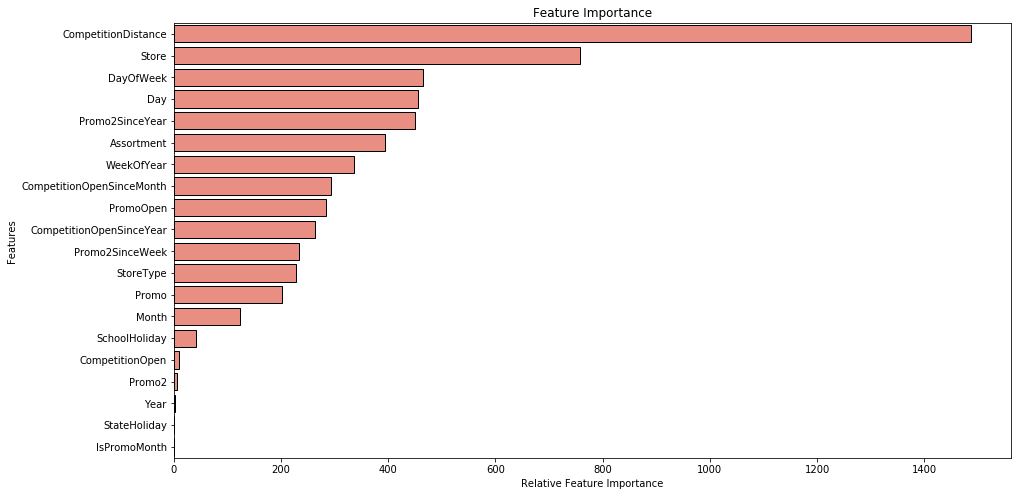

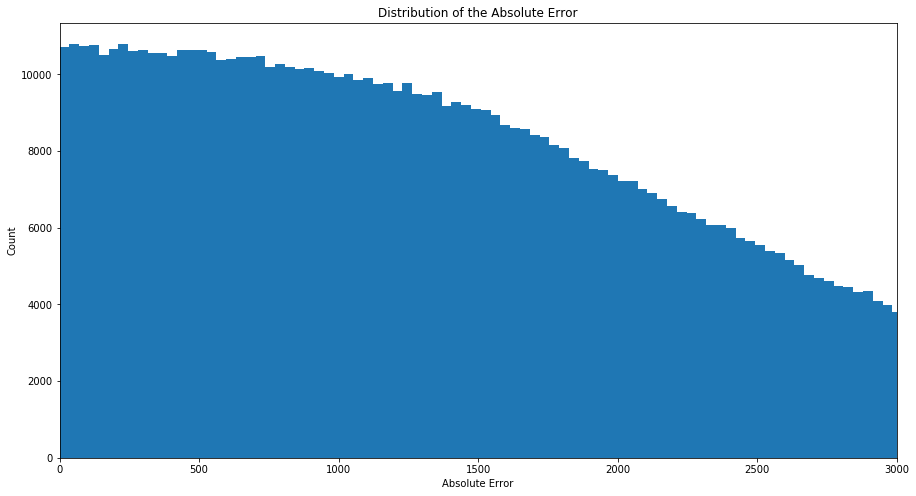

In [49]:
estimator=lgb.LGBMRegressor(objective='regression',num_leaves=31,learning_rate=0.01,n_estimators=201)
estimator.fit(x_train,y_train)
y_pred=estimator.predict(x_valid)

print('Save model...') 
 
#estimator.save_model('model.txt')

print('The rmse of prediction is:', mean_squared_error(y_valid,y_pred)**0.5)
print('Feature importances:', list(estimator.feature_importances_))

features=estimator.feature_importances_
features_list=x_train.columns.values
feature_importance = DataFrame(list(reversed(sorted(zip(features, features_list)))))
fig,ax=plt.subplots(1,1,figsize=(15,8))
sns.barplot(x=0,y=1,color="salmon",data=feature_importance,edgecolor="black")
plt.xlabel("Relative Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")


mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
mae = median_absolute_error(y_valid, y_pred)

# Calculate the mean absolute error for all `y_v`
pred_dist = abs((y_valid)-(y_pred))

# Get the statistics on `pred_dist`
mean = np.mean(pred_dist)
variance = np.var(pred_dist)
sigma = np.sqrt(variance)
print("Mean Squared Error:", mse)
print("R2 Error:", r2)
print("Median Absolute Error:", mae)
print("Mean:", mean)
print("Variance(sigma2):", variance)
print("Sigma:", sigma)

# Plot the distribution of the mean absolute error
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plt.hist(pred_dist, bins=1000)
plt.xlim([0,3000])
plt.xlabel("Absolute Error")
plt.ylabel("Count")
plt.title("Distribution of the Absolute Error")

print("Training Score:%f" % estimator.score(x_train,y_train))
print('Valid Score:%f' % estimator.score(x_valid,y_valid))